<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_05_%ED%9E%88%ED%8A%B8%EB%A7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.05. 히트맵

---
* 날짜: 2022-04-18
* 이름: 박태현

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()
```

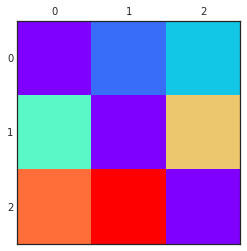

In [2]:
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()

#### | 컬러바

```
plt.colorbar(ax, 
             cmap=None, # 컬러맵
             alpha=None, # 투명도
             orientation='vertical', # 위치 {'vertical', 'horizontal'}
             extend=None,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = None # 길이 축소
             aspect = None # 세로, 가로 비
             label=''# 라벨)
```

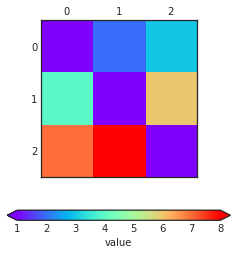

In [7]:
plt.matshow(x, cmap='rainbow')
plt.colorbar(orientation = 'horizontal', 
             extend = 'both',
             label = 'value')
plt.show()

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.heatmap(x)
```

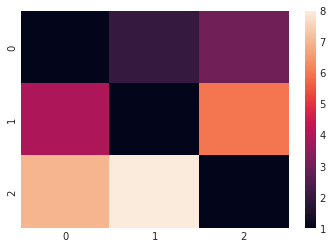

In [3]:
sns.heatmap(x)

#### | 옵션

```
seaborn.heatmap(data,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=0, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = # 최소값
                vmax = # 최대값
                ax=None, **kwargs)
```

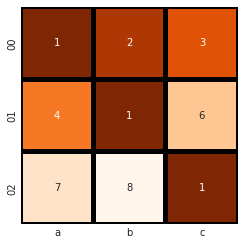

In [21]:
sns.heatmap(x,cmap = 'Oranges_r', annot = True, # 히트맵 안에 값 표기
            linecolor = 'k', # 선 색깔
            linewidth = 4, # 선 굵기
            cbar = False, # 컬러바 유무
            square = True, 
            xticklabels=['a','b','c'],
            yticklabels=['00','01','02']
            )
plt.show()

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.


In [22]:
df = pd.DataFrame(x)
df

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1



* 데이터프레임에서 기본적으로 플롯을 제공합니다.

```
df.style.background_gradient()
```


In [23]:
df.style.background_gradient()

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1


* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.heatmap(data=df)
```


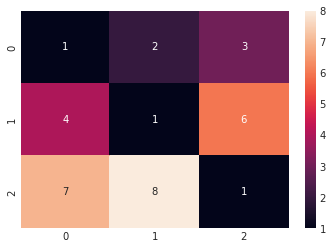

In [26]:
sns.heatmap(data=df, annot = True)


##  **실습** 
---



### (1) pivot 테이블 이용한 시계열 데이터 시각화


```
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

```

In [37]:
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

df = pd.DataFrame([day, t]).T
df['count'] = vals

df.columns = ['day', 'time', 'count']
df

,day,time,count
0,2020/01/01,오전,202
1,2020/01/01,오후,448
2,2020/01/01,저녁,370
3,2020/01/02,오전,206
4,2020/01/02,오후,171
5,2020/01/02,저녁,288
6,2020/01/03,오전,120
7,2020/01/03,오후,202
8,2020/01/03,저녁,221
9,2020/01/04,오전,314


In [40]:
df.pivot('day', 'time', 'count').style.background_gradient()

time,오전,오후,저녁
day,,,
2020/01/01,202,448,370
2020/01/02,206,171,288
2020/01/03,120,202,221
2020/01/04,314,430,187
2020/01/05,472,199,459


### (2) Iris 데이터 변수별 상관관계 분석


```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [80]:
from sklearn.datasets import load_iris
iris = load_iris()

x_name = iris.feature_names
y_name = iris.target_names
x_data = iris.data
y_data = iris.target

df_iris = pd.DataFrame(x_data)
df_iris.columns = x_name

df_iris['label'] = y_data
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### (3) Iris 데이터 종류별 크기 분석



In [81]:
df_iris.corr().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


In [84]:
# 라벨이 0 / 1 / 2 각각의 평균

df_iris.groupby('label').mean().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.936000,2.770000,4.260000,1.326000
2,6.588000,2.974000,5.552000,2.026000


In [103]:
test = df_iris.groupby('label').mean()

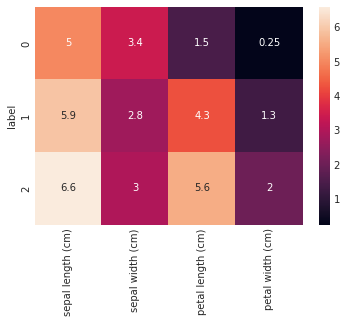

In [105]:
# 히트맵으로 위에 것을 구현
sns.heatmap(test, annot = True)


##  **과제** 
---



### (1) 히트맵을 이용한 flight 데이터 시각화


```
df=sns.load_dataset('flights')
```

* `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러오세요.
* `year`를 세로축, `month`를 가로축으로 하는 피벗 테이블을 그리고 히트맵으로 시각화 하세요.



In [64]:
df = sns.load_dataset('flights')

df.pivot('year', 'month').style.background_gradient()


### (2) 캘리포니아 집값 데이터 변수별 상관관계 분석

* /content/sample_data/california_housing_test.csv을 불러오세요.
* 변수별 상관관계를 나타내는 히트맵을 `seaborn`을 이용해  그리세요.
* 상관관계가 높은 


In [65]:
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


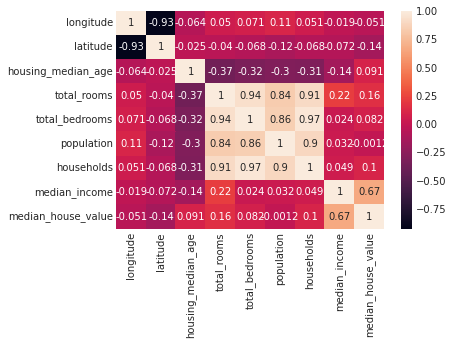

In [74]:
sns.heatmap(df.corr(), annot = True) # 1가도 상관 관계가 높고, -1로 가도 높다